# El método del codo y el factor de la silueta del clustering...

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

In [22]:
x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([4, 5, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

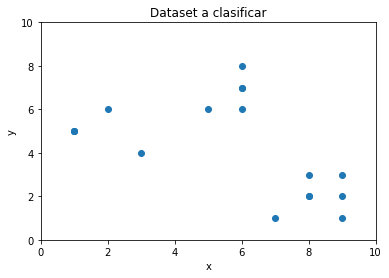

In [23]:
plt.plot()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title("Dataset a clasificar")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(x1, x2)
plt.show()

In [24]:
### En lugar de plt.cm.spectral utilizar plt.cm.nipy_spectral o
#cmap = cm.get_cmap("Spectral")
#colors = cmap(a / b)

# centroid = [sum(X) / len(X) for i in K]
# for i in K lo que hace es replicar k veces el resultado.

ValueError: 'c' argument has 9 elements, which is not acceptable for use with 'x' with size 1, 'y' with size 1.

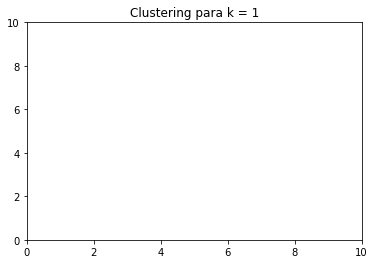

In [50]:
max_k = 10                        ## Máximo número de cluster que se van a crear.
K = range(1, max_k)
ssw = []

#color_palette = [plt.nipy_spectral(float(i) / max_k) for i in K]
#cmap = plt.cm.get_cmap("Spectral")
#color_palette = [(camp(float(i) / max_k) for i in K)]
color_palette = [plt.nipy_spectral(float(i) / max_k) for i in K]   ## Creo que es lo que me da error.
centroid = [sum(X) / len(X) for i in K]
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))

for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(X)
    centers = pd.DataFrame(kmeanModel.cluster_centers_)
    labels = kmeanModel.labels_
    ssw_k = sum(np.min(cdist(X, kmeanModel.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    label_color = [color_palette[i] for i in labels]
    
    ## Fabricaremos una silueta para cada cluster.
    ## Por seguridad, no hacemos siluetas si k = 1 o k = len(X)
    if 1 < k < len(X):
        ## Crear un subplot de una fila y dos columnas.
        fig, (axis1, axis2) = plt.subplot(1, 2)
        fig.set_size_inches(20, 8)
        ## El primer subplot contendrá la silueta, que puede tener valores desde -1 a 1.
        ## En nuestro caso, ya controlamos que los valores están entre -0.1 y 1.
        axis1.set_xlim([-0.1, 1.0])
        ## El número de clusters a insertar determinará el tamaño de cada barra.
        ## El coeficiente (n_clusters + 1) * 10 será el espacio en blanco que dejaremos entre siluetas individuales de 
        ## cada cluster para separarlas.
        axis1.set_ylim([0, len(X) + (k + 1) * 10])
        silhouette_avg = silhouette_score(X, labels)
        print("* Para k = ", k, " el promedio de la silueta es de: ", silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        y_lower = 10
        for i in range(k):
            # Agregamos la silueta del cluster i-ésimo.
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("    - Para i = ", i + 1, " la siluta del cluster vale: ", np.mean(ith_cluster_sv))
            ## Ordenamos descendentemente las siluetas del cluster i-ésimo.
            ith_cluster_sv.sort()
            ## Calculamos deonde colocar la primera silueta en el eje vertical.
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            ## Elejimos el color del cluster.
            color = color_palette[i]
            ## Pintamos la silueta del cluster i-ésimo.
            axis1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sv, facecolor = color, alpha = 0.7)
            ## Etiquetamos dicho cluster con el número en el centro.
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i + 1))
            ## Calculamos el nuevo y_lower par el siguiente cluster del gráfico
            y_lower = y_upper + 10   ## Dejamos vacias diez posiciones sin muestra.
        axis1.set_title("Representación de la silueta para k = %s" %str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("ID del Cluster")
        ## Fin de la representación de la silueta.
    ## Plot de los k-means con los puntos respectivos.
    plt.plot()
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title("Clustering para k = %s" %str(k))
    plt.scatter(x1, x2, c = label_color)
    plt.scatter(centers[0], centers[1], c = color_palette, marker = "x")
    plt.show()

In [ ]:
float(i) / max_k
cmap = plt.nipy_spectral